In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('fifa23_players.csv', low_memory = False)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ... goalkeeping_diving  \
0       93         93   78000000.0  320000.0   34  ...                  6   
1       92         92  119500000.0  270000.0   32  ...                 15   
2       91         91   45000000.0  270000.0   36  ...                  7   
3       91         91  129000000.0  270000.0   29  ...                  9   
4       91         91  125500000.0  350000.0   30  ...                 15   

   goalkeeping_handling  goalkeeping_kicking goalkeeping_positioning  \
0                    11                   15                      14   
1                     6                   12                       8   
2                    11                   15                      14   
3                     9                   15                      15   
4                    13                    5                      10   

   goalkeeping_reflexes goalkeeping_speed  \
0                     8               NaN   
1                    10               NaN   
2                    11               NaN   
3                    11               NaN   
4                    13               NaN   

                                     player_face_url  \
0  https://cdn.sofifa.net/players/158/023/22_120.png   
1  https://cdn.sofifa.net/players/188/545/22_120.png   
2  https://cdn.sofifa.net/players/020/801/22_120.png   
3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 80 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   player_url                   19239 non-null  object 
 2   short_name                   19239 non-null  object 
 3   long_name                    19239 non-null  object 
 4   player_positions             19239 non-null  object 
 5   overall                      19239 non-null  int64  
 6   potential                    19239 non-null  int64  
 7   value_eur                    19165 non-null  float64
 8   wage_eur                     19178 non-null  float64
 9   age                          19239 non-null  int64  
 10  dob                          19239 non-null  object 
 11  height_cm                    19239 non-null  int64  
 12  weight_kg                    19239 non-null  int64  
 13  club_position   

In [5]:
fifa_df = df.drop(columns = ['player_url','player_face_url','club_logo_url',
                   'nation_logo_url','nation_flag_url','sofifa_id'],axis = 1)

In [6]:
#Top 100 players with the highest rating. 
df_100_overall = fifa_df.sort_values(by = ['overall'], ascending = False).head(100)
df_100_overall

short_name                                    long_name  \
0             L. Messi               Lionel Andrés Messi Cuccittini   
1       R. Lewandowski                           Robert Lewandowski   
2    Cristiano Ronaldo          Cristiano Ronaldo dos Santos Aveiro   
3            Neymar Jr                Neymar da Silva Santos Júnior   
4         K. De Bruyne                              Kevin De Bruyne   
..                 ...                                          ...   
80           K. Walker                                  Kyle Walker   
81       P. Aubameyang  Pierre-Emerick Emiliano François Aubameyang   
130         J. Giménez                 José María Giménez de Vargas   
120             Felipe           Felipe Augusto de Almeida Monteiro   
121        Y. Carrasco                    Yannick Ferreira Carrasco   

    player_positions  overall  potential    value_eur  wage_eur  age  \
0         RW, ST, CF       93         93   78000000.0  320000.0   34   
1                 ST       92         92  119500000.0  270000.0   32   
2             ST, LW       91         91   45000000.0  270000.0   36   
3            LW, CAM       91         91  129000000.0  270000.0   29   
4            CM, CAM       91         91  125500000.0  350000.0   30   
..               ...      ...        ...          ...       ...  ...   
80                RB       85         85   39000000.0  170000.0   31   
81        ST, LW, LM       85         85   43500000.0  145000.0   32   
130               CB       84         88   52000000.0   74000.0   26   
120               CB       84         84   27500000.0   74000.0   32   
121           LM, ST       84         84   45000000.0   81000.0   27   

            dob  height_cm  ...  mentality_composure  \
0    1987-06-24        170  ...                   96   
1    1988-08-21        185  ...                   88   
2    1985-02-05        187  ...                   95   
3    1992-02-05        175  ...                   93   
4    1991-06-28        181  ...                   89   
..          ...        ...  ...                  ...   
80   1990-05-28        183  ...                   75   
81   1989-06-18        187  ...                   87   
130  1995-01-20        185  ...                   76   
120  1989-05-16        190  ...                   75   
121  1993-09-04        185  ...                   79   

    defending_marking_awareness  defending_standing_tackle  \
0                            20                         35   
1                            35                         42   
2                            24                         32   
3                            35                         32   
4                            68                         65   
..                          ...                        ...   
80                           77                         84   
81                           20                         29   
130                          87                         87   
120                          86                         85   
121                          44                         47   

    defending_sliding_tackle goalkeeping_diving  goalkeeping_handling  \
0                         24                  6                    11   
1                         19                 15                     6   
2                         24                  7                    11   
3                         29                  9                     9   
4                         53                 15                    13   
..                       ...                ...                   ...   
80                        83                 12                     6   
81                        36                  6                     9   
130                       86                  9                    11   
120                       82                  9                    11   
121                       35                  9                    11   


In [7]:
#Top 100 players with the highest salary.
df_100_wages = fifa_df.sort_values(by = ['wage_eur'], ascending = False).head(100)
df_100_wages

short_name                          long_name player_positions  \
4    K. De Bruyne                    Kevin De Bruyne          CM, CAM   
11     K. Benzema                      Karim Benzema           CF, ST   
0        L. Messi     Lionel Andrés Messi Cuccittini       RW, ST, CF   
14       Casemiro  Carlos Henrique Venancio Casimiro              CDM   
24       T. Kroos                         Toni Kroos               CM   
..            ...                                ...              ...   
631      L. Jović                         Luka Jović               ST   
158      J. Matip               Joël Andre Job Matip               CB   
26       K. Navas                Keylor Navas Gamboa               GK   
31      H. Lloris                        Hugo Lloris               GK   
436     S. Umtiti                 Samuel Yves Umtiti               CB   

     overall  potential    value_eur  wage_eur  age         dob  height_cm  \
4         91         91  125500000.0  350000.0   30  1991-06-28        181   
11        89         89   66000000.0  350000.0   33  1987-12-19        185   
0         93         93   78000000.0  320000.0   34  1987-06-24        170   
14        89         89   88000000.0  310000.0   29  1992-02-23        185   
24        88         88   75000000.0  310000.0   31  1990-01-04        183   
..       ...        ...          ...       ...  ...         ...        ...   
631       79         84   27000000.0  130000.0   23  1997-12-23        182   
158       83         83   30500000.0  130000.0   29  1991-08-08        194   
26        88         88   15500000.0  130000.0   34  1986-12-15        185   
31        87         87   13500000.0  125000.0   34  1986-12-26        188   
436       80         80   19500000.0  125000.0   27  1993-11-14        182   

     ...  mentality_composure defending_marking_awareness  \
4    ...                   89                          68   
11   ...                   90                          43   
0    ...                   96                          20   
14   ...                   84                          85   
24   ...                   88                          71   
..   ...                  ...                         ...   
631  ...                   78                          25   
158  ...                   80                          86   
26   ...                   67                          28   
31   ...                   65                          29   
436  ...                   74                          80   

     defending_standing_tackle defending_sliding_tackle goalkeeping_diving  \
4                           65                       53                 15   
11                          24                       18                 13   
0                           35                       24                  6   
14                          88                       87                 13   
24                          73                       60                 10   
..                         ...                      ...                ...   
631                         26                       16                  8   
158                         86                       81                 11   
26                          14                       14                 89   
31                          10                       18                 88   
436                         80                       79                 15   

     goalkeeping_handling goalkeeping_kicking goalkeeping_positioning  \
4                      13                   5                      10   
11                     11                   5                       5   
0                      11                  15                      14   
14                     14                  16                      12   
24                     11                  13                       7   
..                    ...                 ...                     ...   
631         

In [8]:
# Comparison of ratings with salaries

columns_to_compare = ['short_name','player_positions','overall','wage_eur','age']
df_100_overall_sub = df_100_overall[columns_to_compare]
df_100_wages_sub = df_100_wages[columns_to_compare]

df_100_overall_sub.reset_index(drop=True, inplace=True)
df_100_wages_sub.reset_index(drop=True, inplace=True)


comparison_result = df_100_overall_sub.compare(df_100_wages_sub, align_axis=0)

comparison_result

short_name player_positions  overall  wage_eur   age
0  self            L. Messi       RW, ST, CF     93.0  320000.0  34.0
   other       K. De Bruyne          CM, CAM     91.0  350000.0  30.0
1  self      R. Lewandowski               ST     92.0  270000.0  32.0
   other         K. Benzema           CF, ST     89.0  350000.0  33.0
2  self   Cristiano Ronaldo           ST, LW     91.0  270000.0  36.0
...                     ...              ...      ...       ...   ...
97 other           K. Navas               GK     88.0  130000.0  34.0
98 self              Felipe               CB     84.0   74000.0  32.0
   other          H. Lloris               GK     87.0  125000.0  34.0
99 self         Y. Carrasco           LM, ST     84.0   81000.0   NaN
   other          S. Umtiti               CB     80.0  125000.0   NaN

[200 rows x 5 columns]

In [9]:
#Top 30 goalkeepers with the highest rank.

df_top_goalkeepers = fifa_df[fifa_df['player_positions'] == 'GK'].sort_values(by='overall', ascending=False).head(30)
df_top_goalkeepers 

short_name                      long_name player_positions  \
5             J. Oblak                      Jan Oblak               GK   
8        M. ter Stegen          Marc-André ter Stegen               GK   
7             M. Neuer             Manuel Peter Neuer               GK   
12         T. Courtois               Thibaut Courtois               GK   
18             Ederson      Ederson Santana de Moraes               GK   
20             Alisson          Alisson Ramsés Becker               GK   
21       G. Donnarumma           Gianluigi Donnarumma               GK   
26            K. Navas            Keylor Navas Gamboa               GK   
31           H. Lloris                    Hugo Lloris               GK   
34         W. Szczęsny       Wojciech Tomasz Szczęsny               GK   
54         K. Casteels                  Koen Casteels               GK   
48       S. Handanovič               Samir Handanovič               GK   
70       K. Schmeichel        Kasper Peter Schmeichel               GK   
73           Y. Sommer                    Yann Sommer               GK   
77          P. Gulácsi                  Péter Gulácsi               GK   
106             De Gea          David De Gea Quintana               GK   
113        E. Martínez       Damián Emiliano Martínez               GK   
127         M. Maignan                   Mike Maignan               GK   
167            N. Pope                      Nick Pope               GK   
194           É. Mendy                  Édouard Mendy               GK   
169        J. Pickford                Jordan Pickford               GK   
154            B. Leno                     Bernd Leno               GK   
152        L. Hrádecký                 Lukáš Hrádecký               GK   
143      Sergio Asenjo           Sergio Asenjo Andrés               GK   
222               Neto           Norberto Murara Neto               GK   
282       D. Livaković              Dominik Livaković               GK   
267         Unai Simón            Unai Simón Mendibil               GK   
265  Raphaelinho Anjos  Raphael William Anjos Rochedo               GK   
243         P. Gollini              Pierluigi Gollini               GK   
226           A. Lopes                  Anthony Lopes               GK   

     overall  potential    value_eur  wage_eur  age         dob  height_cm  \
5         91         93  112000000.0  130000.0   28  1993-01-07        188   
8         90         92   99000000.0  250000.0   29  1992-04-30        187   
7         90         90   13500000.0   86000.0   35  1986-03-27        193   
12        89         91   85500000.0  250000.0   29  1992-05-11        199   
18        89         91   94000000.0  200000.0   27  1993-08-17        188   
20        89         90   82000000.0  190000.0   28  1992-10-02        191   
21        89         93  119500000.0  110000.0   22  1999-02-25        196   
26        88         88   15500000.0  130000.0   34  1986-12-15        185   
31        87         87   13500000.0  125000.0   34  1986-12-26        188   
34        87         87   42000000.0  105000.0   31  1990-04-18        195   
54        86         87   52000000.0   88000.0   29  1992-06-25        197   
48        86         86    7500000.0   78000.0   36  1984-07-14        193   
70        85         85    9000000.0  115000.0   34  1986-11-05        189   
73        85         85   26500000.0   40000.0   32  1988-12-17        183   
77        85         85   28500000.0   87000.0   31  1990-05-06        191   
106       84         84   28000000.0  120000.0   30  1990-11-07        192   
113       84         85   33500000.0   81000.0   28  1992-09-02        195   
127       84         89   49500000.0   45000.0   25  1995-07-03        191   
167       83         83   25000000.0   45000.0   29  1992-04-19        199   
194       83         85   30000000.0  105000.0   29  1992-03-01        197   
169       83         85   33000000.0   83000.0   27  1994-03-07        185   
1

In [10]:
#Top 30 clubs with players which have the highest rank

top_clubs = fifa_df.loc[fifa_df.groupby('club_name')['overall'].idxmax()][['club_name','short_name',
                                                                           'overall']].sort_values(by = 'overall', 
                                                                                         ascending = False).head(30)
top_clubs

club_name         short_name  overall
0         Paris Saint-Germain           L. Messi       93
1           FC Bayern München     R. Lewandowski       92
5          Atlético de Madrid           J. Oblak       91
4             Manchester City       K. De Bruyne       91
2           Manchester United  Cristiano Ronaldo       91
9           Tottenham Hotspur            H. Kane       90
10                    Chelsea           N. Kanté       90
8                FC Barcelona      M. ter Stegen       90
11             Real Madrid CF         K. Benzema       89
15                  Liverpool        V. van Dijk       89
29          Borussia Dortmund         E. Haaland       88
34                   Juventus        W. Szczęsny       87
36                      Lazio        C. Immobile       87
48                      Inter      S. Handanovič       86
54              VfL Wolfsburg        K. Casteels       86
55                     Napoli         L. Insigne       86
60             Leicester City           J. Vardy       86
53              Villarreal CF             Parejo       86
72              Real Sociedad        David Silva       85
81                    Arsenal      P. Aubameyang       85
73   Borussia Mönchengladbach          Y. Sommer       85
77                 RB Leipzig         P. Gulácsi       85
69                 Sevilla FC           A. Gómez       85
111                   Everton           L. Digne       84
105          RC Celta de Vigo         Iago Aspas       84
131       Real Betis Balompié           N. Fekir       84
112                  Atalanta          J. Iličić       84
113               Aston Villa        E. Martínez       84
122       Eintracht Frankfurt          F. Kostić       84
110                 AS Monaco      W. Ben Yedder       84

In [11]:
#Top 30 teams where players have the highest average speed.

avg_speed = fifa_df.groupby('club_name')['pace'].mean()
pd.DataFrame(avg_speed).sort_values(by = 'pace', ascending = False).head(30)

pace
club_name                           
FC Red Bull Salzburg       76.640000
New York Red Bulls         76.272727
SK Slavia Praha            75.800000
Paris Saint-Germain        75.724138
Shakhtar Donetsk           75.640000
Juventus                   75.391304
São Paulo                  75.333333
Jeonbuk Hyundai Motors     75.320000
FC Porto                   75.260870
Ajax                       75.250000
Napoli                     74.791667
Feyenoord                  74.652174
Manchester City            74.586207
Racing Club de Lens        74.434783
AC Sparta Praha            74.391304
Real Madrid CF             74.366667
Vélez Sarsfield            74.360000
Olympiacos CFP             74.320000
PSV                        74.240000
KRC Genk                   74.227273
FC Bayern München          74.200000
SL Benfica                 74.192308
OGC Nice                   74.041667
Orlando Pirates            73.880000
FCSB (Steaua)              73.800000
AC Milan                   73.720000
Atlético de Madrid         73.607143
Sporting CP                73.476190
Club América               73.434783
RCD Espanyol de Barcelona  73.400000

In [12]:
#Top of all Leagues where the best dribblers are gathered.

top_dribblers = fifa_df.loc[df.groupby('league_name')['dribbling'].idxmax()][['league_name','short_name',
                                                                              'dribbling']].sort_values(by = 'dribbling', 
                                                                                                ascending = False).head(30)
top_dribblers

league_name        short_name  dribbling
0                           French Ligue 1          L. Messi       95.0
45                  English Premier League         J. Sancho       91.0
41                         Italian Serie A         P. Dybala       90.0
32                  Spain Primera Division         L. Modrić       88.0
64                    German 1. Bundesliga          K. Coman       88.0
300               Ukrainian Premier League            Marlos       86.0
248             Portuguese Liga ZON SAGRES              Rafa       86.0
514                   Chinese Super League        M. Dembélé       85.0
286                USA Major League Soccer              Nani       85.0
109                     Holland Eredivisie          D. Tadić       85.0
412             Argentina Primera División         E. Salvio       84.0
189          Campeonato Brasileiro Série A   Ronaldo Cabrais       84.0
509          Japanese J. League Division 1           Iniesta       84.0
246           Saudi Abdul L. Jameel League  Anderson Talisca       83.0
785                        Mexican Liga MX           Á. Mena       82.0
433                     Greek Super League      K. Fortounis       82.0
837             Belgian Jupiler Pro League           N. Lang       82.0
1614                  German 2. Bundesliga    L. Bittencourt       82.0
309               Spanish Segunda División    Jonathan Viera       82.0
329                      Turkish Süper Lig          E. Višća       82.0
2954           English League Championship         O. Ejaria       82.0
1602                      Danish Superliga           R. Falk       81.0
444                 Russian Premier League         Q. Promes       81.0
5802  Liga de Fútbol Profesional Boliviano            Willie       81.0
1305                     Croatian Prva HNL       B. Petković       80.0
755          Czech Republic Gambrinus Liga        N. Stanciu       80.0
2089         Hungarian Nemzeti Bajnokság I          T. Nguen       80.0
1162          Austrian Football Bundesliga      Z. Junuzović       80.0
1150           Australian Hyundai A-League       A. Diamanti       79.0
2167        South African Premier Division        K. Billiat       79.0

In [13]:
#Top 30 teams with players of the highest rating, including 1 goalkeeper, 4 defenders, 4 midfielders, and 2 forwards.


top_clubs = fifa_df.loc[fifa_df.groupby('club_name')['overall'].idxmax()][['club_name','short_name',
                                                                           'overall','player_positions']].sort_values(by = 'overall', 
                                                                                                             ascending = False).head(30)

goalkeepers_count = 30
defenders_count = 120
midfielders_count = 120
strikers_count = 60

def select_top_30_teams(df):
    selected_teams = []
    goalkeepers_selected = 0
    defenders_selected = 0
    midfielders_selected = 0
    strikers_selected = 0

    for index, row in df.iterrows():
        positions = row['player_positions']
        if 'GK' in positions and goalkeepers_selected < goalkeepers_count:
            selected_teams.append(row)
            goalkeepers_selected += 1
        elif any(pos in positions for pos in ['RB', 'CB', 'LB', 'RWB', 'LWB']) and defenders_selected < defenders_count:
            selected_teams.append(row)
            defenders_selected += 1
        elif any(pos in positions for pos in ['CDM', 'CM', 'RM', 'LM', 'CAM']) and midfielders_selected < midfielders_count:
            selected_teams.append(row)
            midfielders_selected += 1
        elif any(pos in positions for pos in ['RW', 'LW', 'CF', 'ST']) and strikers_selected < strikers_count:
            selected_teams.append(row)
            strikers_selected += 1

        
        if (goalkeepers_selected == goalkeepers_count and
            defenders_selected == defenders_count and
            midfielders_selected == midfielders_count and
            strikers_selected == strikers_count):
            break

    return pd.DataFrame(selected_teams)

top_30_teams = select_top_30_teams(top_clubs).head(30)
top_30_teams[['club_name', 'short_name', 'overall', 'player_positions']]

club_name         short_name  overall player_positions
0         Paris Saint-Germain           L. Messi       93       RW, ST, CF
1           FC Bayern München     R. Lewandowski       92               ST
5          Atlético de Madrid           J. Oblak       91               GK
4             Manchester City       K. De Bruyne       91          CM, CAM
2           Manchester United  Cristiano Ronaldo       91           ST, LW
9           Tottenham Hotspur            H. Kane       90               ST
10                    Chelsea           N. Kanté       90          CDM, CM
8                FC Barcelona      M. ter Stegen       90               GK
11             Real Madrid CF         K. Benzema       89           CF, ST
15                  Liverpool        V. van Dijk       89               CB
29          Borussia Dortmund         E. Haaland       88               ST
34                   Juventus        W. Szczęsny       87               GK
36                      Lazio        C. Immobile       87               ST
48                      Inter      S. Handanovič       86               GK
54              VfL Wolfsburg        K. Casteels       86               GK
55                     Napoli         L. Insigne       86           LW, CF
60             Leicester City           J. Vardy       86               ST
53              Villarreal CF             Parejo       86               CM
72              Real Sociedad        David Silva       85          CAM, CM
81                    Arsenal      P. Aubameyang       85       ST, LW, LM
73   Borussia Mönchengladbach          Y. Sommer       85               GK
77                 RB Leipzig         P. Gulácsi       85               GK
69                 Sevilla FC           A. Gómez       85      CAM, CF, CM
111                   Everton           L. Digne       84               LB
105          RC Celta de Vigo         Iago Aspas       84           ST, RW
131       Real Betis Balompié           N. Fekir       84      CAM, RM, ST
112                  Atalanta          J. Iličić       84           CF, ST
113               Aston Villa        E. Martínez       84               GK
122       Eintracht Frankfurt          F. Kostić       84          LM, LWB
110                 AS Monaco      W. Ben Yedder       84               ST

## Diagram of player age distribution by positions

Text(0, 0.5, 'Player Positions')

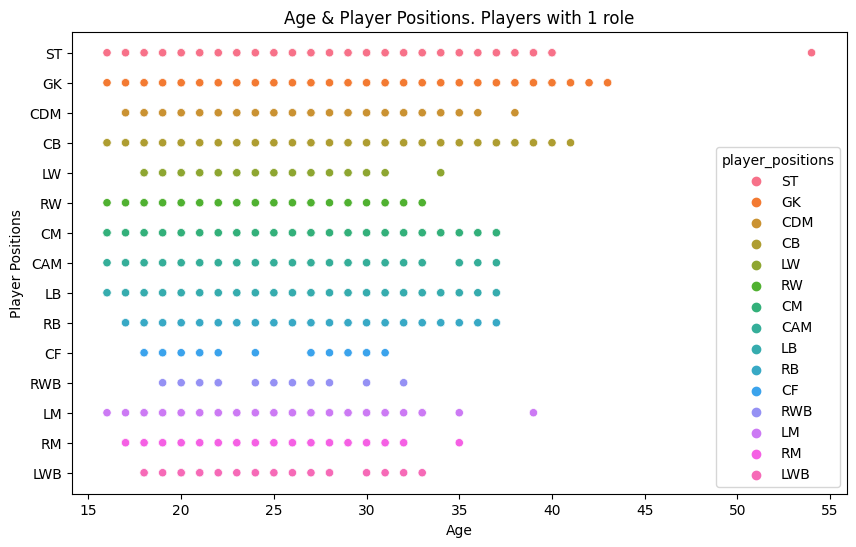

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


single_position = fifa_df[fifa_df['player_positions'].apply(lambda x: len(x.split(', ')))==1]

sns.color_palette('flare', as_cmap = True)
plt.figure(figsize = (10,6))
sns.scatterplot(data = single_position, x='age', y = 'player_positions', hue = 'player_positions')
plt.title("Age & Player Positions. Players with 1 role")
plt.xlabel('Age')
plt.ylabel('Player Positions') 

## Diagram of player distribution by rating across positions

Text(0, 0.5, 'Positions')

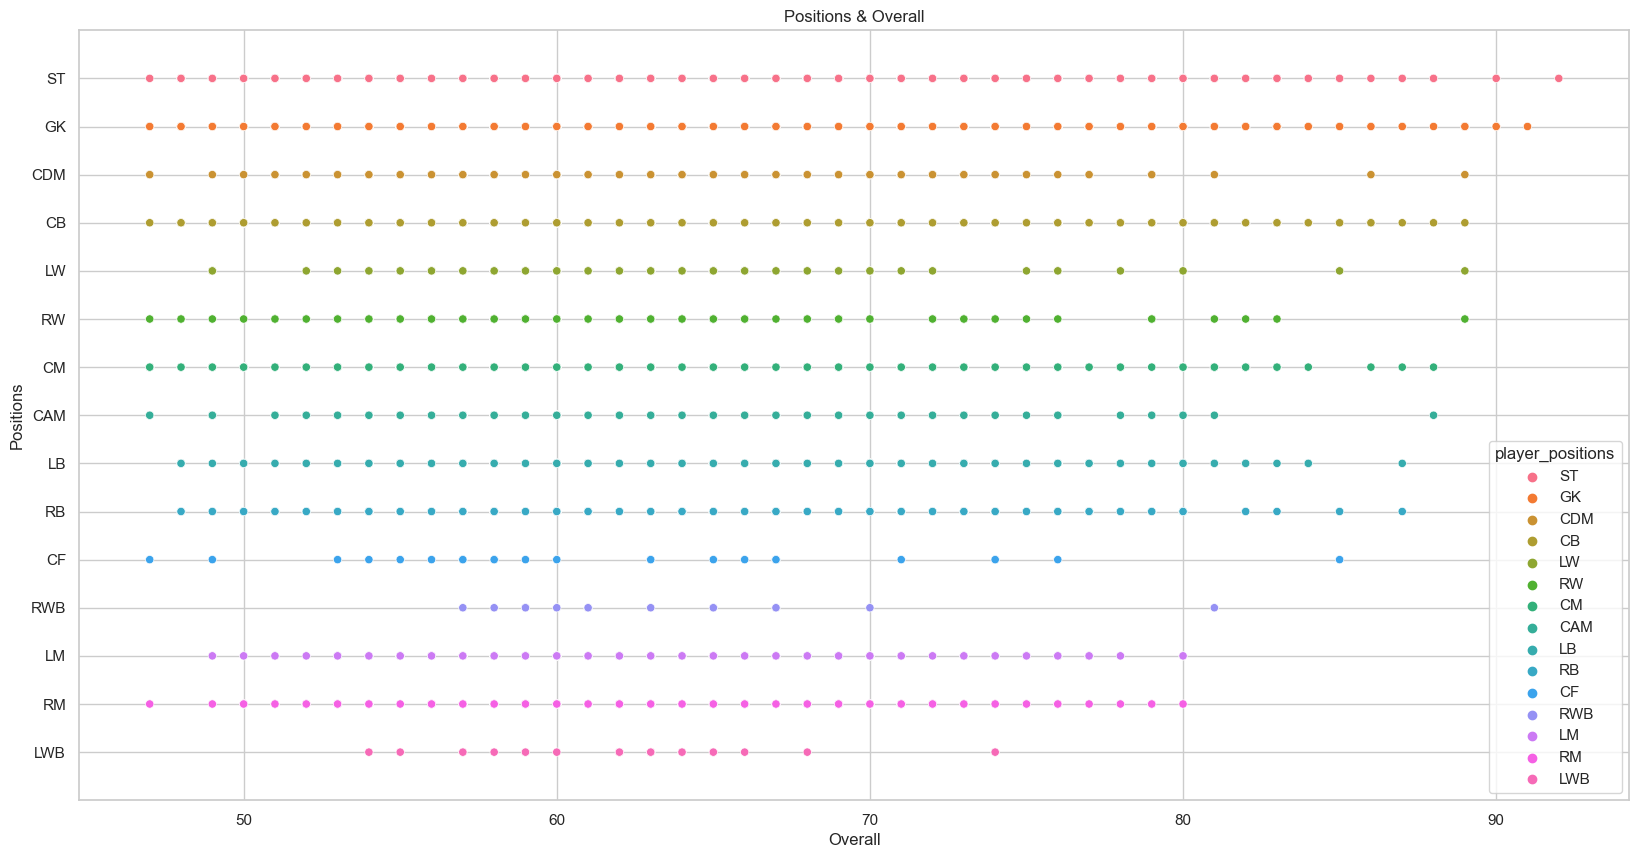

In [15]:
single_position = fifa_df[fifa_df['player_positions'].apply(lambda x: len(x.split(', ')))==1]
sns.set_theme (style = 'whitegrid')

sns.color_palette('rocket', as_cmap = True)

f, ax = plt.subplots(figsize = (20,10))
sns.scatterplot(data = single_position, x='overall', y = 'player_positions', hue = 'player_positions')
miny, nexty,*_, maxy = ax.get_yticks()
eps = (nexty-miny)
ax.set_ylim(maxy+eps, miny-eps)
plt.title("Positions & Overall")
plt.xlabel('Overall')
plt.ylabel('Positions') 

## Diagram of player nationalities distribution by rating

Text(0, 0.5, 'Nationality')

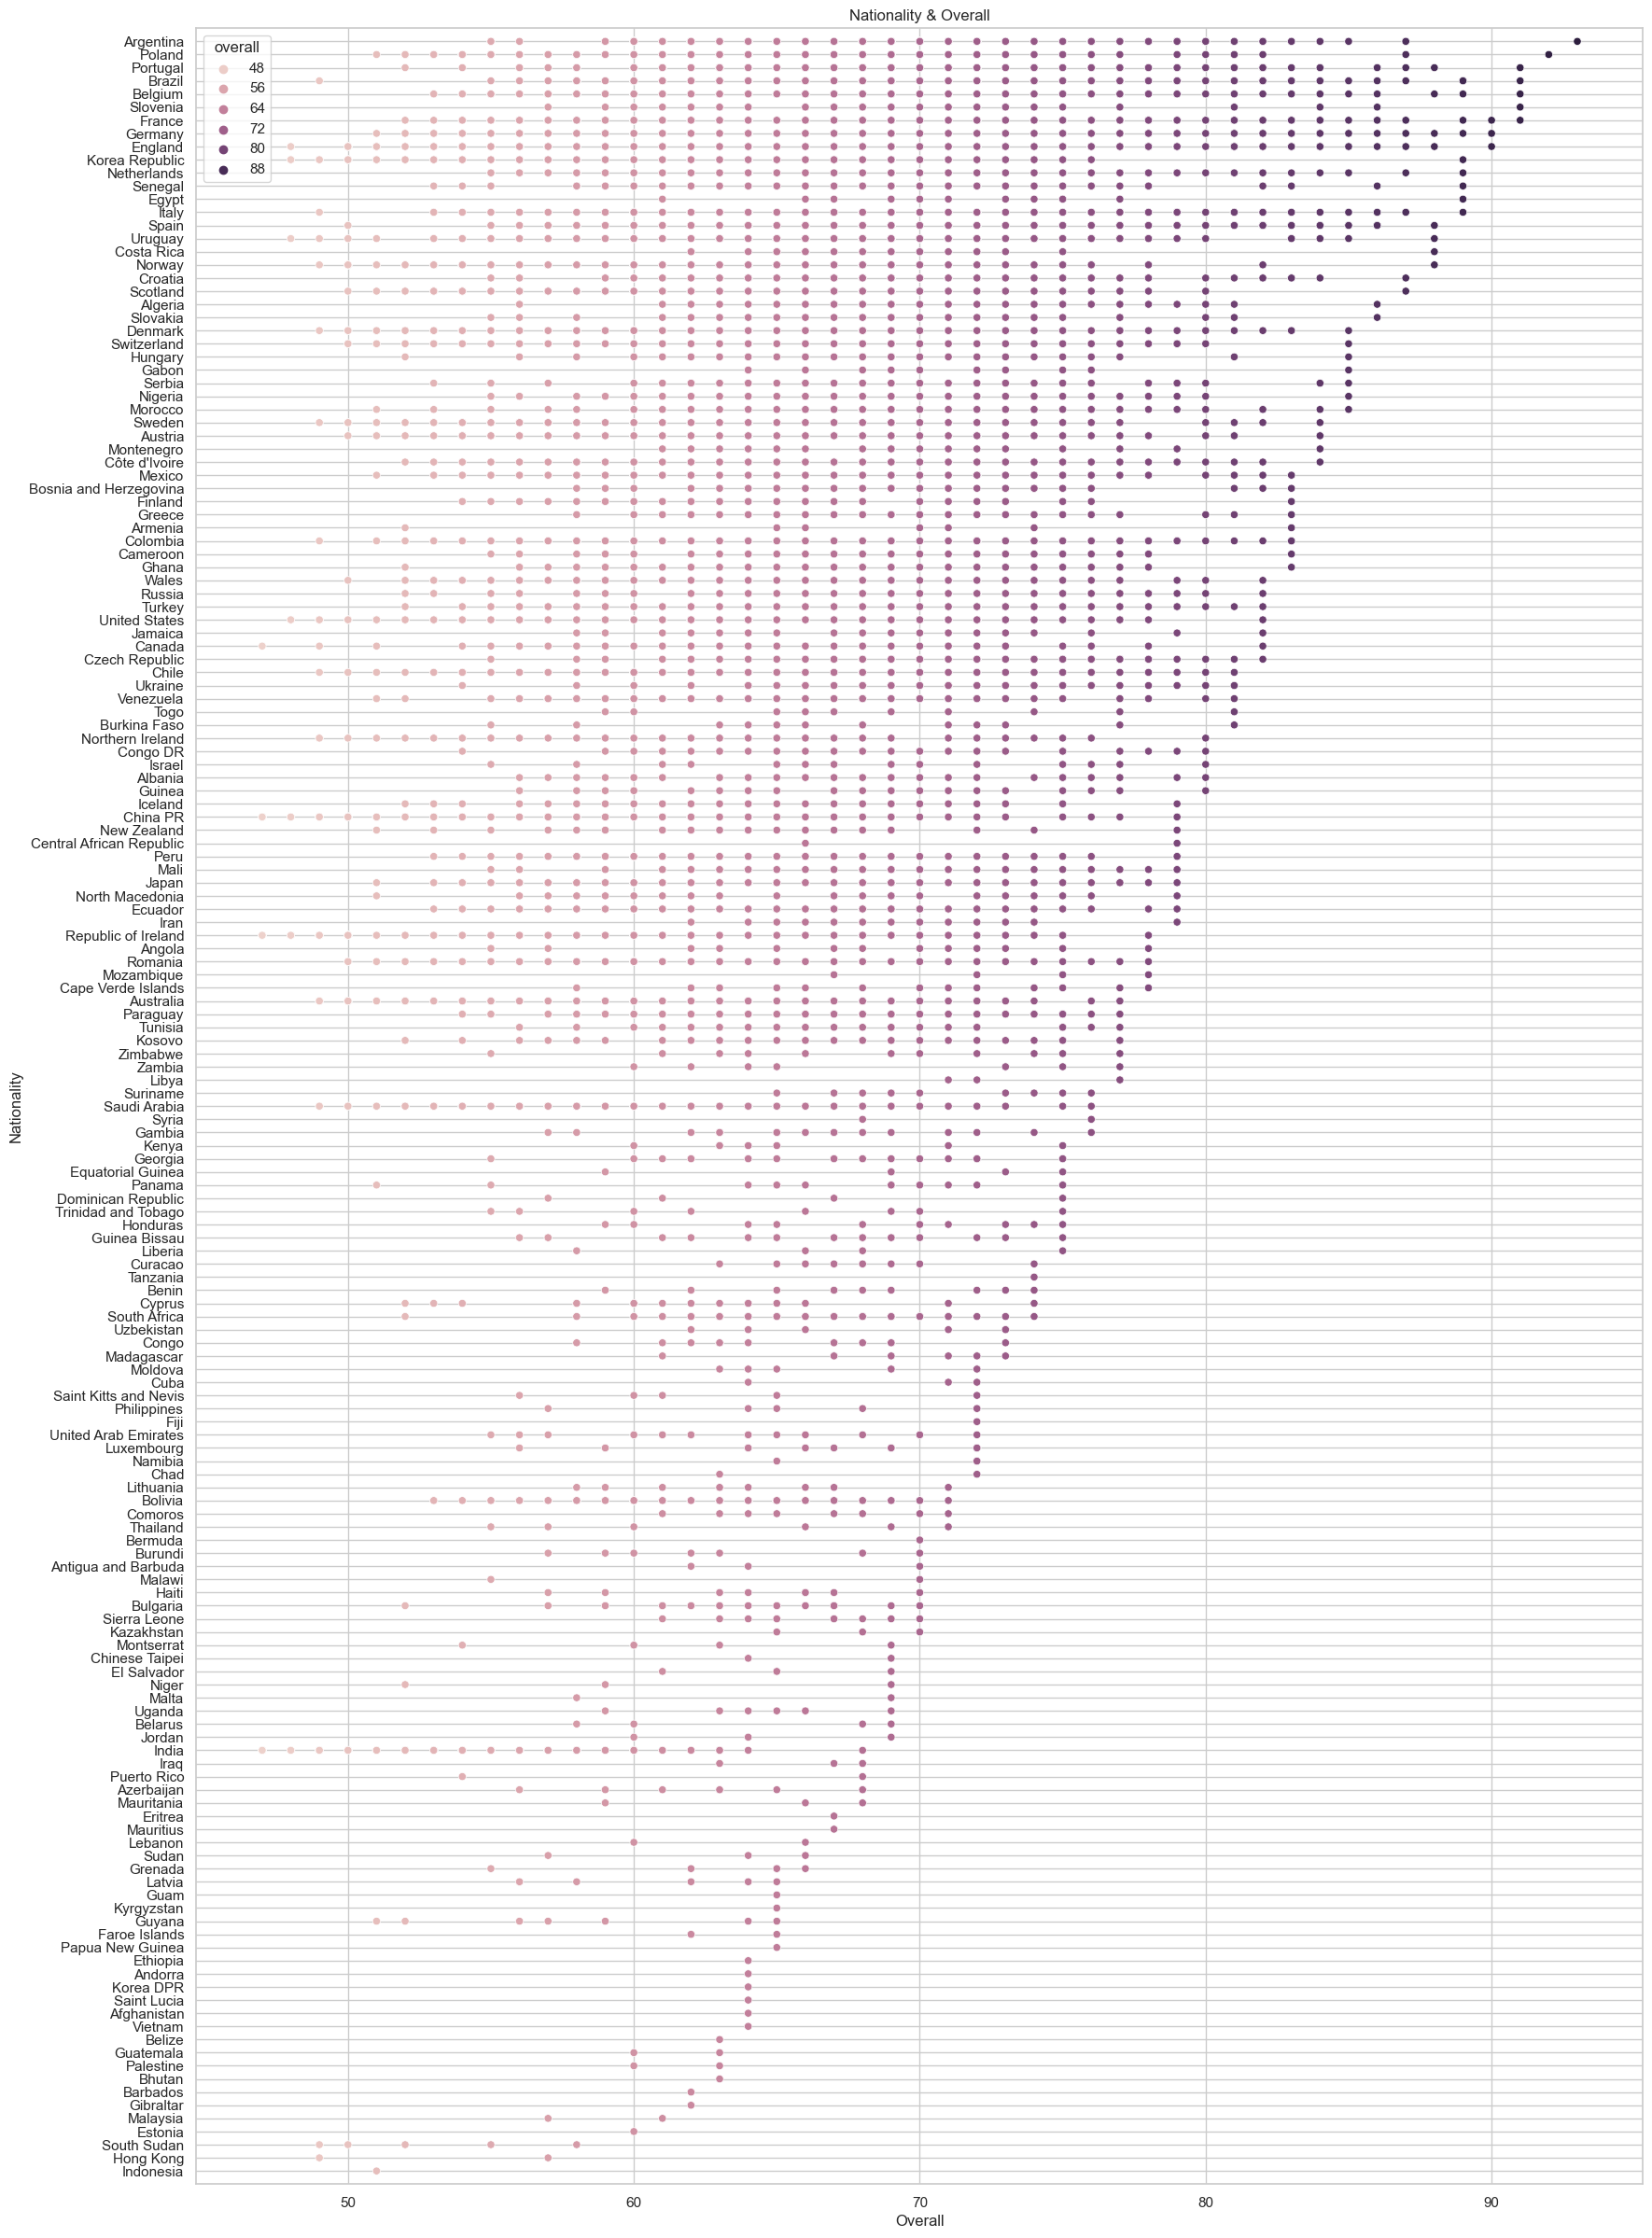

In [16]:
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(20, 30))

sns.scatterplot(x = 'overall', y = 'nationality_name', data = df, hue = 'overall')
miny, nexty,*_, maxy = ax.get_yticks()
eps = (nexty-miny)
ax.set_ylim(maxy+eps, miny-eps)
plt.title("Nationality & Overall")
plt.xlabel('Overall')
plt.ylabel('Nationality')

## Panalty Metrics

To calculate the Penalty metric, I chose these data because:

Shooting: This parameter indicates a player's efficiency when striking the ball towards the goal, considering both accuracy and shot power.

Physic: It evaluates a player's physical strength and endurance. In my opinion, this is an important parameter, as the physical condition can influence a player's performance.

Power Shot: It reflects the force with which a player can shoot the ball, affecting the speed and power of their shots.

Mentality Penalties: This assesses a player's mental strength when taking penalty kicks, considering factors such as composure and confidence. The calmer and more confident a player is, the higher the likelihood of a successful shot.

Mentality Composure: This indicates how well a player can remain focused and control emotions during the game.

Next, I created weights to indicate the importance of each parameter in evaluating the quality of penalty execution.

1: This constant is used to ensure that the penalty success rate is not below 0%.

100: This represents the maximum number of points for all characteristics influencing the penalty result.


In [17]:

shooting_weights = 0.13
physic_weights = 0.11
mentality_penalty_weights = 0.30
mentality_composure_weights = 0.19
skill_fk_accuracy_weights = 0.27

fifa_df['penalty_metric'] = (1+(
    fifa_df['shooting'] * shooting_weights +
    fifa_df['physic'] * physic_weights +
    fifa_df['power_shot_power'] * mentality_penalty_weights +
    fifa_df['mentality_penalties'] * skill_fk_accuracy_weights +
    fifa_df['mentality_composure'] * skill_fk_accuracy_weights)/100
)

fifa_df

short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST       92         92  119500000.0  270000.0   32   
2               ST, LW       91         91   45000000.0  270000.0   36   
3              LW, CAM       91         91  129000000.0  270000.0   29   
4              CM, CAM       91         91  125500000.0  350000.0   30   
...                ...      ...        ...          ...       ...  ...   
19234              CDM       47         52      70000.0    1000.0   22   
19235               CM       47         59     110000.0     500.0   19   
19236               CM       47         55     100000.0     500.0   21   
19237               ST       47         60     110000.0     500.0   19   
19238              CAM       47         60     110000.0     500.0   19   

              dob  height_cm  ...  defending_marking_awareness  \
0      1987-06-24        170  ...                           20   
1      1988-08-21        185  ...                           35   
2      1985-02-05        187  ...                           24   
3      1992-02-05        175  ...                           35   
4      1991-06-28        181  ...                           68   
...           ...        ...  ...                          ...   
19234  1999-01-02        180  ...                           38   
19235  2002-03-18        175  ...                           37   
19236  2000-02-07        178  ...                           38   
19237  2002-04-23        173  ...                           10   
19238  2002-02-06        167  ...                           33   

      defending_standing_tackle  defending_sliding_tackle goalkeeping_diving  \
0                            35                        24                  6   
1                            42                        19                 15   
2                            32                        24                  7   
3                            32                        29                  9   
4                            65                        53                 15   
...                         ...                       ...                ...   
19234                        43                        48                  6   
19235                        44                        47                 11   
19236                        44                        48                  8   
19237                        14                        11                  7   
19238                        31                        37                  8   

      goalkeeping_handling  goalkeeping_kicking goalkeeping_positioning  \
0                       11                   15                      14   
1                        6                   12                       8   
2                       11                   15                      14   
3                        9                   15                      15   
4                       13                    5                      10   
...                    ...                  ...                     ...   
19234                   10                    5       

## Goalkeeper's Metric

For the calculation, I considered the following data:

Movement Reactions: This indicates how quickly and effectively a player can react to changes in the game, such as the movement of other players or the trajectory of the ball. This is crucial for goalkeepers, especially during penalty kick rebounds.

Goalkeeping Diving: It reflects the goalkeeper's ability to make jumps to reach and stop shots.

Goalkeeping Handling: This measures the goalkeeper's skill in handling the ball, including catching or deflecting shots.

Goalkeeping Positioning: It evaluates how well the goalkeeper chooses their position relative to the goal, making it more challenging for opponents to score.

Goalkeeping Reflexes: This indicates the speed of a goalkeeper's reactions and reflexes, allowing them to quickly respond to unexpected shots, particularly during follow-up attempts after the initial save.


Goalkeeping Speed: It measures the goalkeeper's movement speed across the goal, helping them effectively cover more space and react efficiently to threats.

Mentality Composure: It signifies how well a player can stay focused and control emotions during the game.

Mentality Aggression: It indicates the player's level of aggression on the field. A player with a high aggression rating may be more energetic and assertive in various football actions.

Next, weights were created to signify the importance of each parameter in assessing the quality of penalty execution:


1: This constant is used to ensure that the penalty success rate is not below 0%.

100: This represents the maximum number of points for all characteristics influencing the penalty result.

In [18]:

movement_reactions_weights = 0.10
goalkeeping_diving_weights = 0.08
goalkeeping_handling_weights= 0.13
goalkeeping_positioning_weights = 0.13
goalkeeping_reflexes_weights = 0.23
goalkeeping_speed_weights = 0.15
mentality_composure_weights = 0.11
mentality_aggression_weights  = 0.07

fifa_df['gk_penalty_metric'] = (1 + (
    fifa_df['movement_reactions'] * movement_reactions_weights + 
    fifa_df['goalkeeping_diving'] * goalkeeping_diving_weights +
    fifa_df['goalkeeping_handling'] * goalkeeping_handling_weights +
    fifa_df['goalkeeping_positioning'] * goalkeeping_positioning_weights +
    fifa_df['goalkeeping_reflexes'] * goalkeeping_reflexes_weights + 
    fifa_df['goalkeeping_speed'] * goalkeeping_speed_weights + 
    fifa_df['mentality_composure'] * mentality_composure_weights +
    fifa_df['mentality_aggression'] * mentality_aggression_weights)/100)

fifa_df

short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST       92         92  119500000.0  270000.0   32   
2               ST, LW       91         91   45000000.0  270000.0   36   
3              LW, CAM       91         91  129000000.0  270000.0   29   
4              CM, CAM       91         91  125500000.0  350000.0   30   
...                ...      ...        ...          ...       ...  ...   
19234              CDM       47         52      70000.0    1000.0   22   
19235               CM       47         59     110000.0     500.0   19   
19236               CM       47         55     100000.0     500.0   21   
19237               ST       47         60     110000.0     500.0   19   
19238              CAM       47         60     110000.0     500.0   19   

              dob  height_cm  ...  defending_standing_tackle  \
0      1987-06-24        170  ...                         35   
1      1988-08-21        185  ...                         42   
2      1985-02-05        187  ...                         32   
3      1992-02-05        175  ...                         32   
4      1991-06-28        181  ...                         65   
...           ...        ...  ...                        ...   
19234  1999-01-02        180  ...                         43   
19235  2002-03-18        175  ...                         44   
19236  2000-02-07        178  ...                         44   
19237  2002-04-23        173  ...                         14   
19238  2002-02-06        167  ...                         31   

      defending_sliding_tackle  goalkeeping_diving goalkeeping_handling  \
0                           24                   6                   11   
1                           19                  15                    6   
2                           24                   7                   11   
3                           29                   9                    9   
4                           53                  15                   13   
...                        ...                 ...                  ...   
19234                       48                   6                   10   
19235                       47                  11                   12   
19236                       48                   8                    6   
19237                       11                   7                   10   
19238                       37                   8                   13   

      goalkeeping_kicking  goalkeeping_positioning goalkeeping_reflexes  \
0                      15                       14                    8   
1                      12                        8                   10   
2                      15                       14                   11   
3                      15                       15                   11   
4                       5                       10                   13   
...                   ...                      ...                  ...   
19234                   5                       15                   13   
19235                   6                        8             

## Top 10 clubs which have best penelties. 

In [19]:
top_clubs_penalties = fifa_df.loc[fifa_df.groupby('club_name')['penalty_metric'].idxmax()][['club_name',
                                                                                  'short_name',
                                                                                  'penalty_metric']].sort_values(by='penalty_metric',
                                                                                                            ascending=False).head(10)
top_clubs_penalties

club_name         short_name  penalty_metric
2     Manchester United  Cristiano Ronaldo          1.9808
9     Tottenham Hotspur            H. Kane          1.9740
1     FC Bayern München     R. Lewandowski          1.9604
25              Chelsea          R. Lukaku          1.9412
4       Manchester City       K. De Bruyne          1.9350
23   Atlético de Madrid          L. Suárez          1.9343
29    Borussia Dortmund         E. Haaland          1.9291
97             AC Milan     Z. Ibrahimović          1.9289
11       Real Madrid CF         K. Benzema          1.9213
3   Paris Saint-Germain          Neymar Jr          1.9194

## Top 10 clubs which have best goalkeepers. 

In [20]:
top_clubs_gk = fifa_df.loc[fifa_df.groupby('club_name')['gk_penalty_metric'].idxmax()][['club_name',
                                                                             'short_name',
                                                                             'gk_penalty_metric']].sort_values(by='gk_penalty_metric',
                                                                                                        ascending=False).head(10)
top_clubs_gk

club_name     short_name  gk_penalty_metric
18       Manchester City        Ederson             1.7806
5     Atlético de Madrid       J. Oblak             1.7748
7      FC Bayern München       M. Neuer             1.7712
31     Tottenham Hotspur      H. Lloris             1.7642
26   Paris Saint-Germain       K. Navas             1.7603
8           FC Barcelona  M. ter Stegen             1.7599
20             Liverpool        Alisson             1.7577
226   Olympique Lyonnais       A. Lopes             1.7499
34              Juventus    W. Szczęsny             1.7459
12        Real Madrid CF    T. Courtois             1.7388

## Business Analysis

Analyzing this dataframe allows us to explore trends in playing styles among teams in different leagues. This is possible through the use of player characteristics, which serve as key indicators in defining a team's playing style. By examining the data, we can identify which aspects of the game are more crucial for teams in specific leagues and how this is reflected in their strategies.

Additionally, we can analyze players' salaries and identify factors influencing this metric. This provides valuable insights into the factors that determine financial success in the world of sports. The potential correlations between player characteristics and their salaries could prove interesting for further study and strategic planning for teams.

Therefore, using this dataframe, we can not only uncover playing styles in different leagues but also identify key factors influencing players' success in terms of their salaries.

### Exploratory Data Analysis

In [21]:
fifa_df.describe()

overall     potential     value_eur       wage_eur           age  \
count  19239.000000  19239.000000  1.916500e+04   19178.000000  19239.000000   
mean      65.772182     71.079370  2.850452e+06    9017.989363     25.210822   
std        6.880232      6.086213  7.613700e+06   19470.176724      4.748235   
min       47.000000     49.000000  9.000000e+03     500.000000     16.000000   
25%       61.000000     67.000000  4.750000e+05    1000.000000     21.000000   
50%       66.000000     71.000000  9.750000e+05    3000.000000     25.000000   
75%       70.000000     75.000000  2.000000e+06    8000.000000     29.000000   
max       93.000000     95.000000  1.940000e+08  350000.000000     54.000000   

          height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000   19178.000000  19178.000000   
mean     181.299704     74.943032   50580.498123      1.354364   
std        6.863179      7.069434   54401.868535      0.747865   
min      155.000000     49.000000       1.000000      1.000000   
25%      176.000000     70.000000     479.000000      1.000000   
50%      181.000000     75.000000    1938.000000      1.000000   
75%      186.000000     80.000000  111139.000000      1.000000   
max      206.000000    110.000000  115820.000000      5.000000   

       club_jersey_number  ...  defending_standing_tackle  \
count        19178.000000  ...               19239.000000   
mean            20.945250  ...                  48.045584   
std             17.909369  ...                  21.232718   
min              1.000000  ...                   5.000000   
25%              9.000000  ...                  28.000000   
50%             18.000000  ...                  56.000000   
75%             27.000000  ...                  65.000000   
max             99.000000  ...                  93.000000   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
count              19239.000000        19239.000000          19239.000000   
mean                  45.906700           16.406102             16.192474   
std                   20.755683           17.574028             16.839528   
min                    5.000000            2.000000              2.000000   
25%                   25.000000            8.000000              8.000000   
50%                   53.000000           11.000000             11.000000   
75%                   63.000000           14.000000             14.000000   
max                   92.000000           91.000000             92.000000   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
count         19239.000000             19239.000000          19239.000000   
mean             16.055356                16.229274             16.491814   
std              16.564554                17.059779             17.884833   
min               2.000000                 2.000000              2.000000   
25%               8.000000                 8.000000              8.000000   
50%              11.000000                11.000000             11.000000   
75%              14.000000                14.000000             14.000000   
max              93.000000                92.000000             90.000000   

       goalkeeping_speed  penalty_metric  gk_penalty_metric  
count        2132.000000    17107.000000        2132.000000  
mean           36.439962        1.618123           1.542932  
std            10.751563        0.105784           0.073214  
min            15.000000        1.317000           1.379300  
25%            27.000000        1.542500           1.486150  
50%            36.000000        1.622100           1.540150  
75%            45.000000        1.692900           1.592425  
max            65.000000        1.980800           1.780600  

[8 rows x 60 columns]

In [22]:
duplicates = fifa_df[fifa_df.duplicated()]
duplicates

Empty DataFrame
Columns: [short_name, long_name, player_positions, overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, club_position, club_team_id, club_name, league_name, league_level, club_loaned_from, club_joined, club_jersey_number, club_contract_valid_until, nationality_name, nation_team_id, nation_position, nation_jersey_number, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type, release_clause_eur, player_tags, player_traits, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed, penalty_metric, gk_penalty_metric]
Index: []

[0 rows x 76 columns]

In [23]:
def EDA(df):
    total_na = fifa_df.isna().sum().sum()
    print("Dimensions : %d rows, %d columns" % (fifa_df.shape[0], fifa_df.shape[1]))
    print("Total NA Values : %d " % (total_na))
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))
    col_name = fifa_df.columns
    dtypes = fifa_df.dtypes
    uniq = fifa_df.nunique()
    na_val = fifa_df.isna().sum()
    for i in range(len(fifa_df.columns)):
        print("%38s %10s   %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

EDA(fifa_df)

Dimensions : 19239 rows, 76 columns
Total NA Values : 153255 
                           Column Name  Data Type     Count Distinct  NA Values
                            short_name     object        18145          0
                             long_name     object        19219          0
                      player_positions     object          674          0
                               overall      int64           47          0
                             potential      int64           46          0
                             value_eur    float64          252         74
                              wage_eur    float64          133         61
                                   age      int64           29          0
                                   dob     object         6312          0
                             height_cm      int64           49          0
                             weight_kg      int64           58          0
                         club_position     o

In [24]:
fifa_df.nunique()

short_name                 18145
long_name                  19219
player_positions             674
overall                       47
potential                     46
                           ...  
goalkeeping_positioning       77
goalkeeping_reflexes          70
goalkeeping_speed             51
penalty_metric              5482
gk_penalty_metric           1565
Length: 76, dtype: int64

In [25]:
# Using get_dummies to create binary features from 'player_positions.
# Splitting player positions and creating dummy variables for each position.

position_dummies = fifa_df['player_positions'].str.get_dummies(sep=', ')

# Delete positions 'SUB' and 'RES'
if 'SUB' in position_dummies.columns:
    position_dummies.drop('SUB', axis=1, inplace=True)
if 'RES' in position_dummies.columns:
    position_dummies.drop('RES', axis=1, inplace=True)

    
# Target
y = position_dummies

#Features 
x = fifa_df.drop('player_positions', axis=1)

y

CAM  CB  CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  RWB  ST
0        0   0    0   1   0   0   0   0   0    0   0   0   1    0   1
1        0   0    0   0   0   0   0   0   0    0   0   0   0    0   1
2        0   0    0   0   0   0   0   0   1    0   0   0   0    0   1
3        1   0    0   0   0   0   0   0   1    0   0   0   0    0   0
4        1   0    0   0   1   0   0   0   0    0   0   0   0    0   0
...    ...  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..
19234    0   0    1   0   0   0   0   0   0    0   0   0   0    0   0
19235    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
19236    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
19237    0   0    0   0   0   0   0   0   0    0   0   0   0    0   1
19238    1   0    0   0   0   0   0   0   0    0   0   0   0    0   0

[19239 rows x 15 columns]

In [26]:
x = x.drop(['nation_position', 'club_position'], axis=1)
x.isnull().sum()[x.isnull().sum()>0]

value_eur                       74
wage_eur                        61
club_team_id                    61
club_name                       61
league_name                     61
league_level                    61
club_loaned_from             18137
club_joined                   1163
club_jersey_number              61
club_contract_valid_until       61
nation_team_id               18480
nation_jersey_number         18480
release_clause_eur            1176
player_tags                  17798
player_traits                 9841
pace                          2132
shooting                      2132
passing                       2132
dribbling                     2132
defending                     2132
physic                        2132
goalkeeping_speed            17107
penalty_metric                2132
gk_penalty_metric            17107
dtype: int64

In [27]:
x = x.drop(['long_name','short_name','dob','club_name', 'league_name', 'club_joined', 'nationality_name',
            'club_contract_valid_until','club_loaned_from', 'nation_team_id', 'nation_jersey_number', 
            'player_tags','player_traits','club_team_id'], axis=1)

In [28]:
x['league_level'] = x['league_level'].fillna(x['league_level'].mode()[0])
x['club_jersey_number'] = x['club_jersey_number'].fillna(x['club_jersey_number'].mode()[0])

x['release_clause_eur'] = pd.Series(np.log(x['release_clause_eur'])).fillna(x['release_clause_eur'].mean())
x['value_eur'] = pd.Series(np.log(x['value_eur'])).fillna(x['value_eur'].mean())
x['wage_eur'] = pd.Series(np.log(x['wage_eur'])).fillna(x['wage_eur'].mean())

x['pace'] = x['pace'].fillna(0)
x['shooting'] = x['shooting'].fillna(0)
x['passing'] = x['passing'].fillna(0)
x['dribbling'] = x['dribbling'].fillna(0)
x['defending'] = x['defending'].fillna(0)
x['physic'] = x['physic'].fillna(0)
x['goalkeeping_speed'] = x['goalkeeping_speed'].fillna(0)
x['penalty_metric'] = x['penalty_metric'].fillna(0)
x['gk_penalty_metric'] = x['penalty_metric'].fillna(0)

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   potential                    19239 non-null  int64  
 2   value_eur                    19239 non-null  float64
 3   wage_eur                     19239 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   league_level                 19239 non-null  float64
 8   club_jersey_number           19239 non-null  float64
 9   preferred_foot               19239 non-null  object 
 10  weak_foot                    19239 non-null  int64  
 11  skill_moves                  19239 non-null  int64  
 12  international_reputation     19239 non-null  int64  
 13  work_rate       

<Figure size 2000x1500 with 0 Axes>

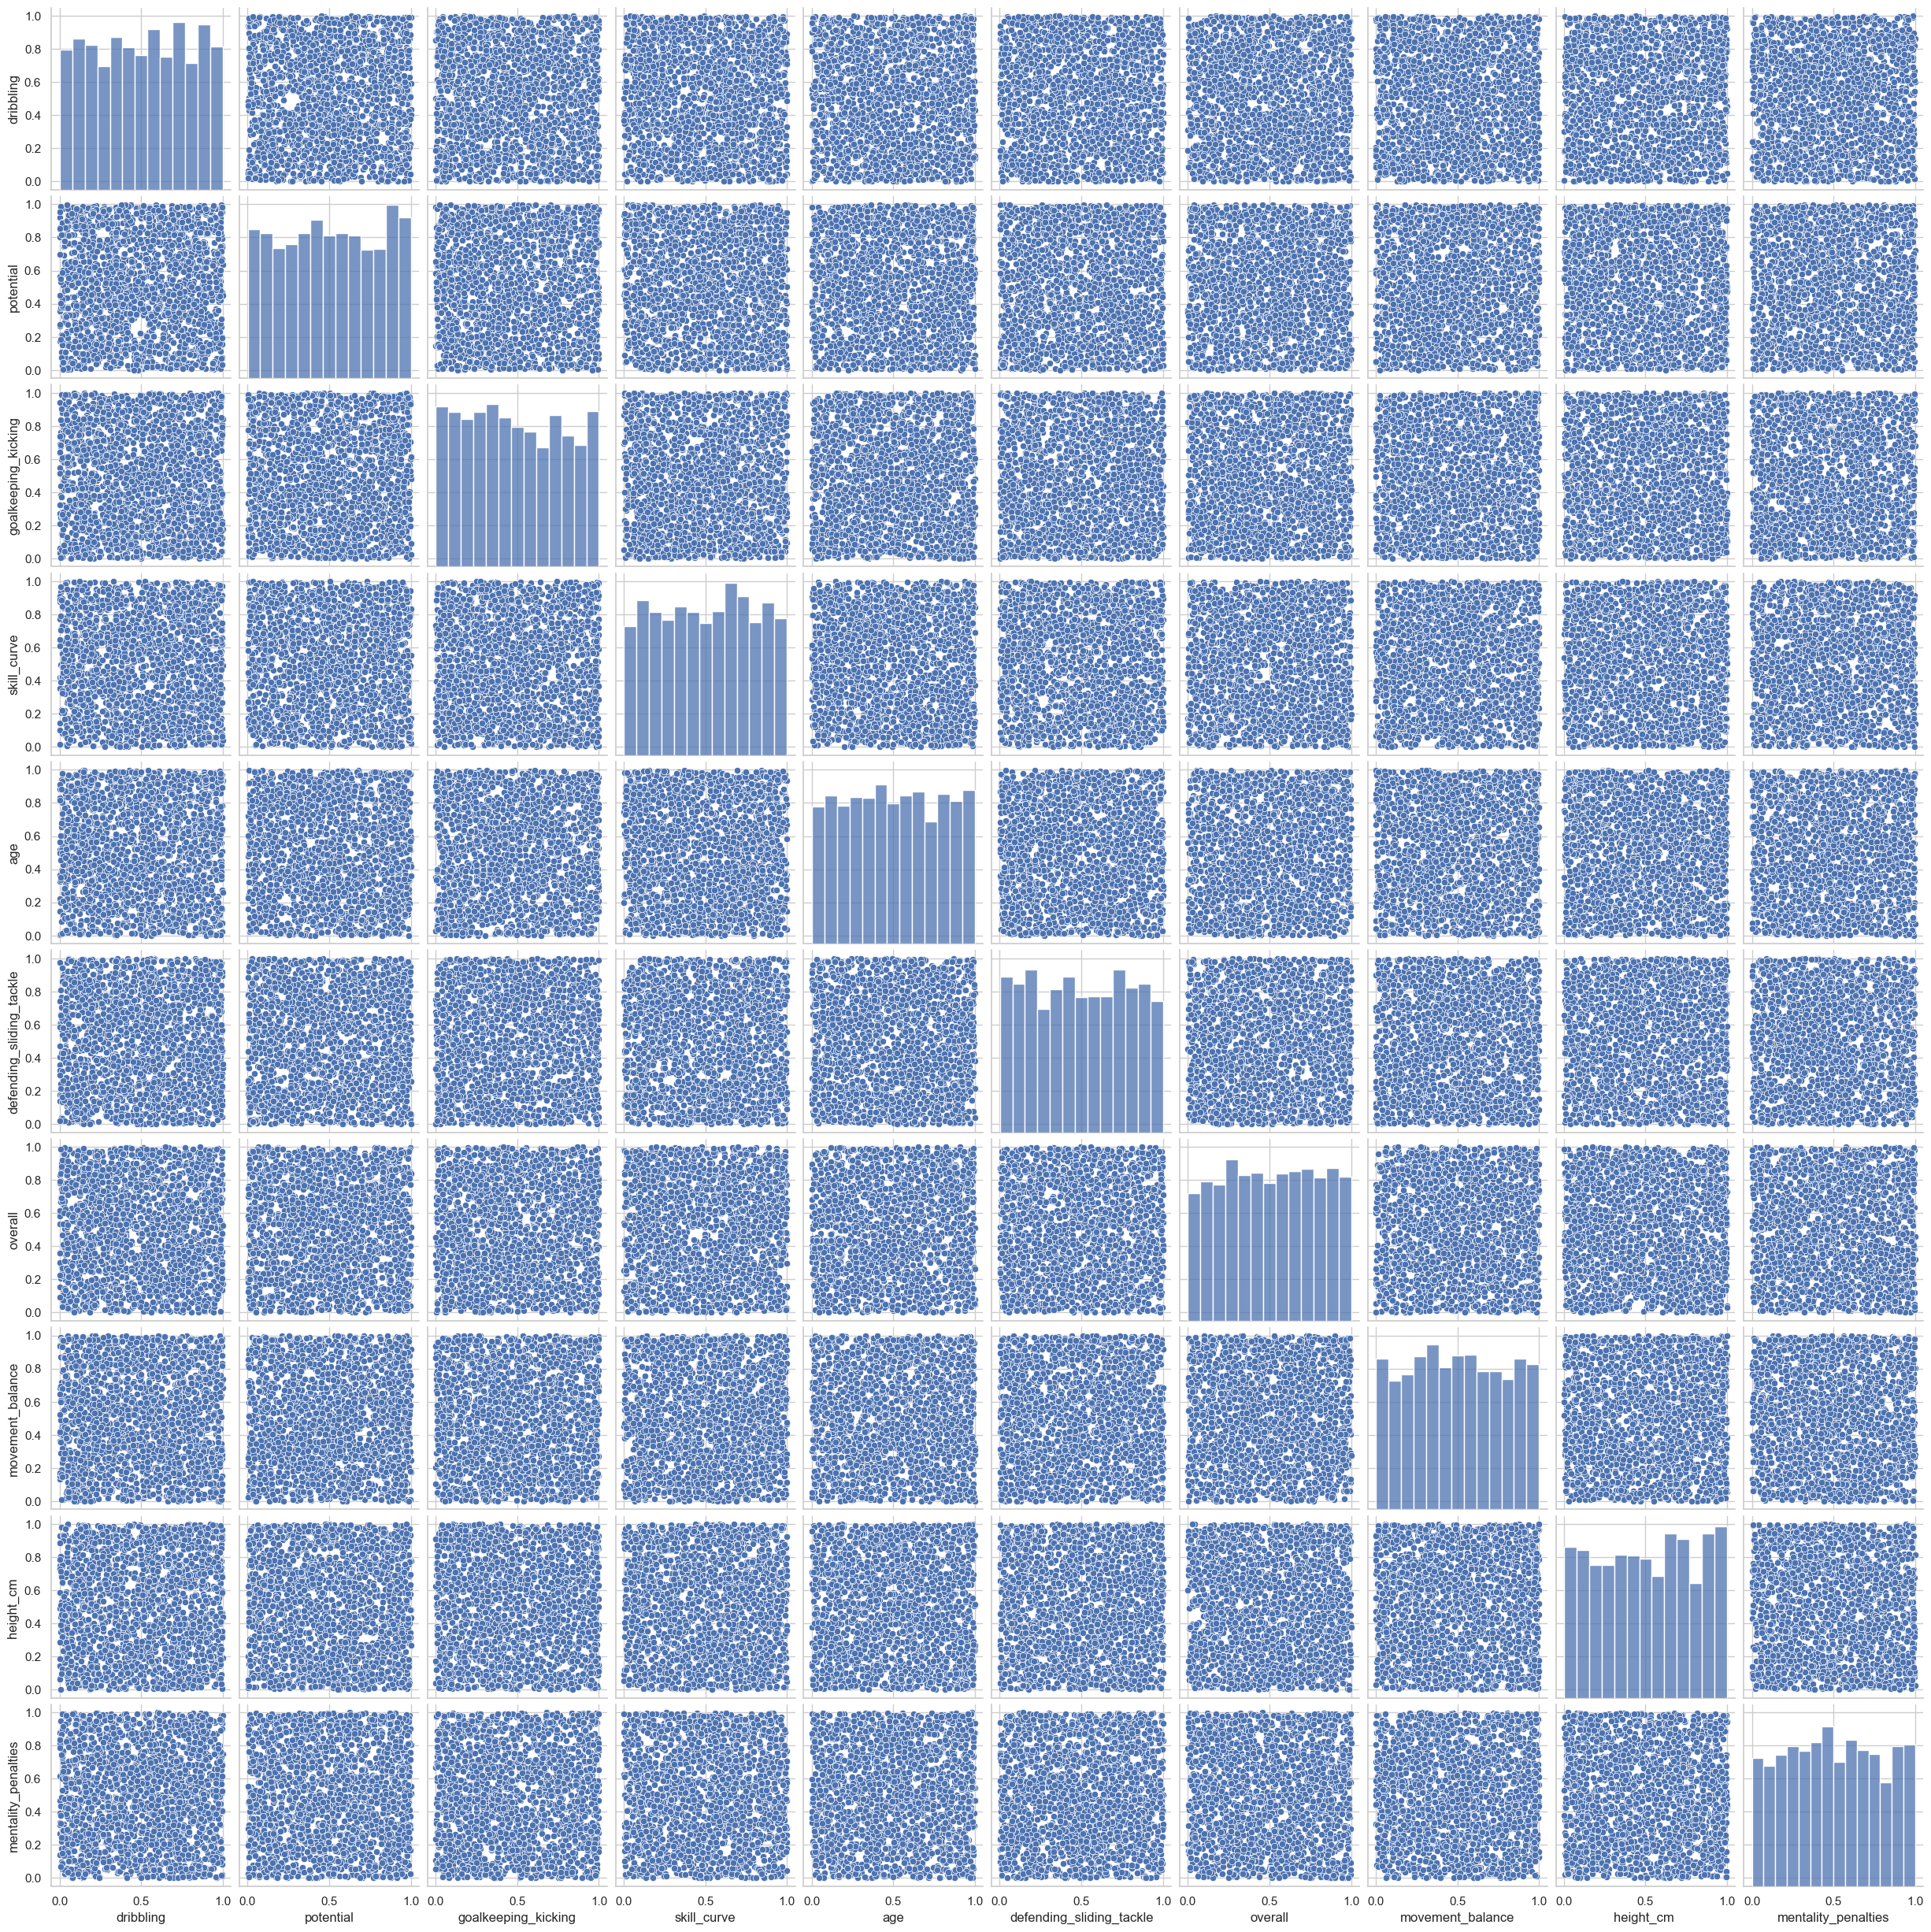

In [30]:
n = 19_239
frac = 0.10
all_columns = ['overall','potential','value_eur','wage_eur','age','height_cm ','weight_kg','league_level',
               'club_jersey_number','preferred_foot','weak_foot','skill_moves','international_reputation',
               'work_rate','body_type','release_clause_eur','pace','shooting','passing','dribbling',
               'physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
               'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
               'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
               'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
               'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
               'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
               'mentality_penalties','mentality_composure','defending_marking_awareness',
               'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
               'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed',
               'penalty_metric','gk_penalty_metric']
selected_columns = np.random.choice(all_columns, size=10, replace = False)

df = pd.DataFrame(np.random.rand(n,10),columns = selected_columns)
plt.figure(figsize=(20,15))
sns.pairplot(df.sample(frac=frac))
plt.show()

Data has imbalance. I will use Random Forest Classifier and XG Boost Classifier.

In [31]:
x['body_type'].unique()

array(['Unique', 'Normal (170-185)', 'Lean (170-185)', 'Normal (185+)',
       'Lean (185+)', 'Normal (170-)', 'Stocky (185+)', 'Lean (170-)',
       'Stocky (170-185)', 'Stocky (170-)'], dtype=object)

In [32]:
x['work_rate'].unique()

array(['Medium/Low', 'High/Medium', 'High/Low', 'High/High',
       'Medium/Medium', 'Medium/High', 'Low/High', 'Low/Medium',
       'Low/Low'], dtype=object)

In [33]:
x['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [34]:
#Transform categorical variables into numerical

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit the label encoder and transform the 'body_type' column
x['body_type'] = label_encoder.fit_transform(x['body_type'])
# Store the mapping for 'body_type' column
body_type_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Fit the label encoder and transform the 'work_rate' column
x['work_rate'] = label_encoder.fit_transform(x['work_rate'])
# Store the mapping for 'work_rate' column
work_type_mapping = {index:label for index, label in enumerate(label_encoder.classes_)}

# Fit the label encoder and transform the 'preferred_foot' column
x['preferred_foot'] = label_encoder.fit_transform(x['preferred_foot'])
# Store the mapping for 'preferred_foot' column
foot_type_mapping = {index:label for index, label in enumerate (label_encoder.classes_)}

# Display the mappings
print('Body Type Mapping:', body_type_mapping)
print('Work Rate Mapping:',work_type_mapping)
print('Preferred Foot Mapping:',foot_type_mapping)

Body Type Mapping: {0: 'Lean (170-)', 1: 'Lean (170-185)', 2: 'Lean (185+)', 3: 'Normal (170-)', 4: 'Normal (170-185)', 5: 'Normal (185+)', 6: 'Stocky (170-)', 7: 'Stocky (170-185)', 8: 'Stocky (185+)', 9: 'Unique'}
Work Rate Mapping: {0: 'High/High', 1: 'High/Low', 2: 'High/Medium', 3: 'Low/High', 4: 'Low/Low', 5: 'Low/Medium', 6: 'Medium/High', 7: 'Medium/Low', 8: 'Medium/Medium'}
Preferred Foot Mapping: {0: 'Left', 1: 'Right'}


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [36]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Random Forest Classifier

In [37]:
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=300, max_depth=7))
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                       n_estimators=300))

In [38]:
weights_per_feature = {key: [] for key in model.estimators_[0].feature_names_in_ }

for estimator in model.estimators_:
    for i in range(len(estimator.feature_names_in_)):
        weights_per_feature[estimator.feature_names_in_[i]].append(estimator.feature_importances_[i])
print(weights_per_feature)

{'overall': [0.007491553463861476, 0.0025716654752727746, 0.00812496470816373, 0.009945888433805524, 0.021952211938906417, 0.0, 0.0026931129417909166, 0.005191636946397344, 0.006222310505521541, 0.0059782076838648165, 0.003399754075809159, 0.005070881278002334, 0.0069620898353378105, 0.008103539036481342, 0.0023694332172234447], 'potential': [0.003811259557227108, 0.0007190533540093864, 0.0021432145178919334, 0.011997013098795481, 0.0019266080584911182, 0.0, 0.002658302563277777, 0.0066867722327265955, 0.008894661809955372, 0.00649166235944908, 0.002234096286620959, 0.005284549992928684, 0.008124852134398812, 0.00973826099176268, 0.0008356715708571359], 'value_eur': [0.004513522952111591, 0.0020142880971277927, 0.004828815276106746, 0.009791543768137697, 0.00823795086651664, 0.0, 0.003274263139641547, 0.005448419242294508, 0.008585353123191955, 0.008654715281408062, 0.0027818326293509634, 0.005649487490419513, 0.00871173836376749, 0.011043341446506528, 0.001811803741160045], 'wage_eur'

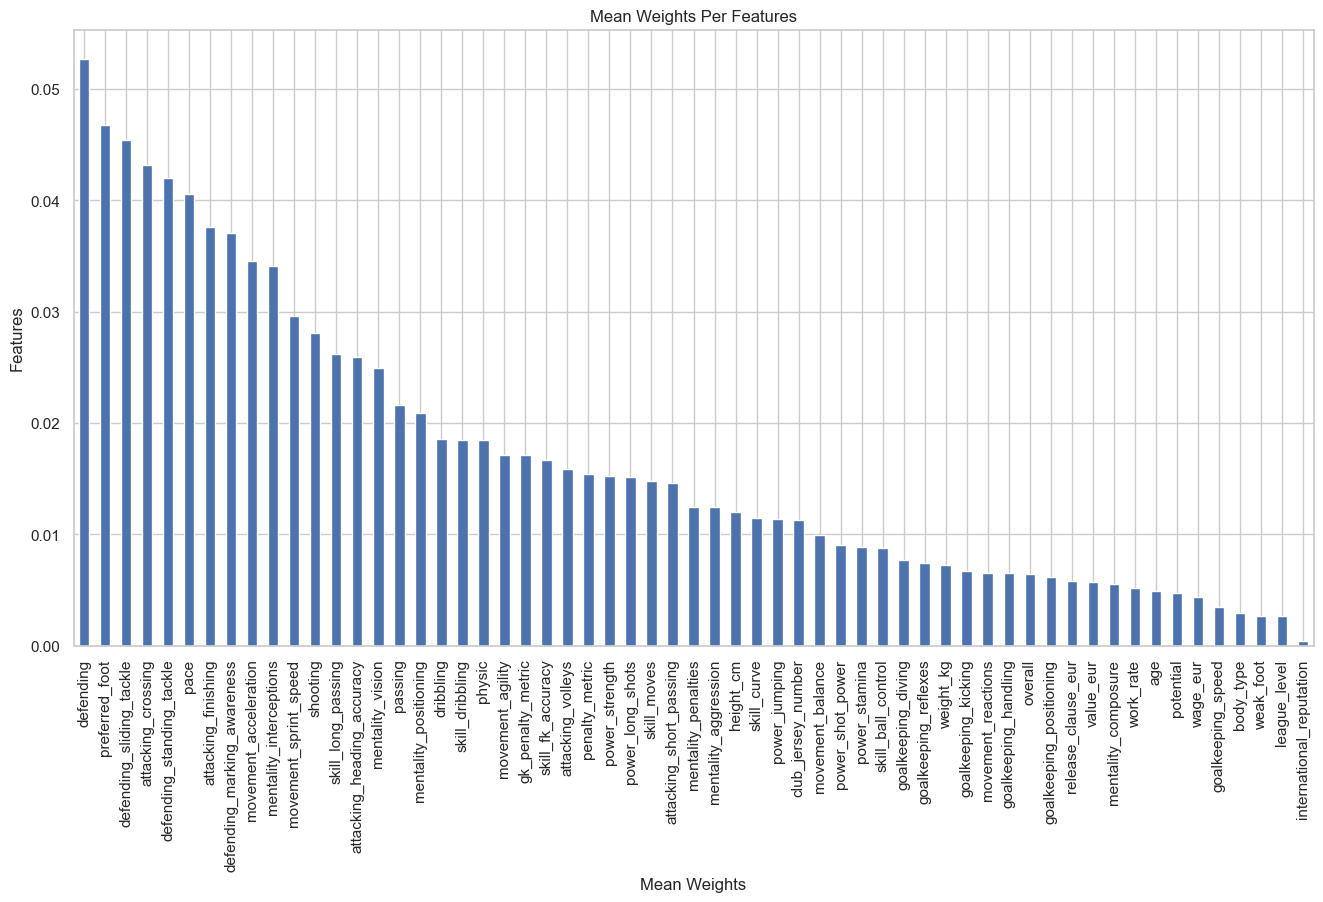

In [39]:
mean_weight_per_feature = pd.Series([np.mean(weights_per_feature[key]) for key in x.columns], index = x.columns)
mean_weight_per_feature = mean_weight_per_feature.sort_values(ascending=False)
mean_weight_per_feature.plot.bar(figsize = (16, 8))
plt.title("Mean Weights Per Features")
plt.ylabel("Features")
plt.xlabel("Mean Weights")
plt.show()

In [40]:
x[mean_weight_per_feature.iloc[:15].index.to_numpy()]

defending  preferred_foot  defending_sliding_tackle  \
0           34.0               0                        24   
1           44.0               1                        19   
2           34.0               1                        24   
3           37.0               1                        29   
4           64.0               1                        53   
...          ...             ...                       ...   
19234       42.0               1                        48   
19235       41.0               1                        47   
19236       41.0               1                        48   
19237       15.0               1                        11   
19238       36.0               1                        37   

       attacking_crossing  defending_standing_tackle  pace  \
0                      85                         35  85.0   
1                      71                         42  78.0   
2                      87                         32  87.0   
3                      85                         32  91.0   
4                      94                         65  76.0   
...                   ...                        ...   ...   
19234                  46                         43  58.0   
19235                  54                         44  59.0   
19236                  39                         44  60.0   
19237                  29                         14  68.0   
19238                  39                         31  68.0   

       attacking_finishing  defending_marking_awareness  \
0                       95                           20   
1                       95                           35   
2                       95                           24   
3                       83                           35   
4                       82                           68   
...                    ...                          ...   
19234                   32                           38   
19235                   33                           37   
19236                   32                           38   
19237                   49                           10   
19238                   32                           33   

       movement_acceleration  mentality_interceptions  movement_sprint_speed  \
0                         91                       40                     80   
1                         77                       49                     79   
2                         85                       29                     88   
3                         93                       37                     89   
4                         76                       66                     76   
...                      ...                      ...                    ...   
19234                     56                       42                     60   
19235                     60                       39                     58   
19236                     60                       38                     60   
19237                     69                       14                     67   
19238                     70                       42                     67   

       shooting  skill_long_passing  attacking_heading_accuracy  \
0          92.0                  91                          70   
1          92.0                  70                          90   
2          94.0                  77                          90   
3          83.0                  81                          63   
4          86.0                  93                          55   
...         ...                 ...                         ...   
19234      35.0                  48                          48   
19235      39.0                  50                          46   
19236      37.0                  49                          43   
19237      46.0                  33                          40   
19238      38.0                  49                          46   

       mentality_vision  
0               

## XG Boost Classifier

In [ ]:
model = MultiOutputClassifier(XGBClassifier(seed=0))
model.fit(x_train, y_train)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
score = cross_val_score(model, x[mean_weight_per_feature.iloc[:15].index.to_numpy()], y, cv=8, 
                        scoring = make_scorer(hamming_loss,greater_is_better=True),
                       n_jobs = 4)

In [42]:
for i in range(0, 15):
    model = XGBClassifier(seed=0)
    score = cross_val_score(model, x[mean_weight_per_feature.iloc[:15].index.to_numpy()], y.iloc[:, i], cv=8, scoring = 'accuracy',
                       n_jobs = 4)
    
    print("Mean score for ", y.columns[i], " ", np.mean(score))

Mean score for  CAM   0.8899634099093334
Mean score for  CB   0.9326864918483055
Mean score for  CDM   0.9020198058675597
Mean score for  CF   0.9634603277282145
Mean score for  CM   0.899212828757338
Mean score for  GK   0.9997400166389351
Mean score for  LB   0.9480731827757618
Mean score for  LM   0.8617396810928425
Mean score for  LW   0.9270759320052165
Mean score for  LWB   0.9708406770074823
Mean score for  RB   0.9443299628823756
Mean score for  RM   0.8705236378385297
Mean score for  RW   0.9321694222380579
Mean score for  RWB   0.970788788436459
Mean score for  ST   0.9434990755186263
